# Polynomial Regression (Non-linear Modeling)

#📁 Step 1: Import Required Libraries

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score



#🧪 Step 2: Generate Synthetic Data

In [2]:
# Set a random seed for reproducibility
np.random.seed(42)

# Generate synthetic data
# Let's say a student studies between 1 and 10 hours
X = np.random.uniform(1, 10, 100).reshape(-1, 1)  # 100 samples, 1 feature

# Generate scores with some noise: score = 5 * hours + noise
noise = np.random.normal(0, 3, 100).reshape(-1, 1)
y = 5 * X + noise  # linear relationship + noise

# Convert to DataFrame for visualization
df = pd.DataFrame({'Study Hours': X.flatten(), 'Score': y.flatten()})
df.head()


,Study Hours,Score
0,4.370861,22.115447
1,9.556429,46.885122
2,7.587945,38.215010
3,6.387926,25.976925
4,2.404168,11.361823


#📊 Step 3: Visualize the Data

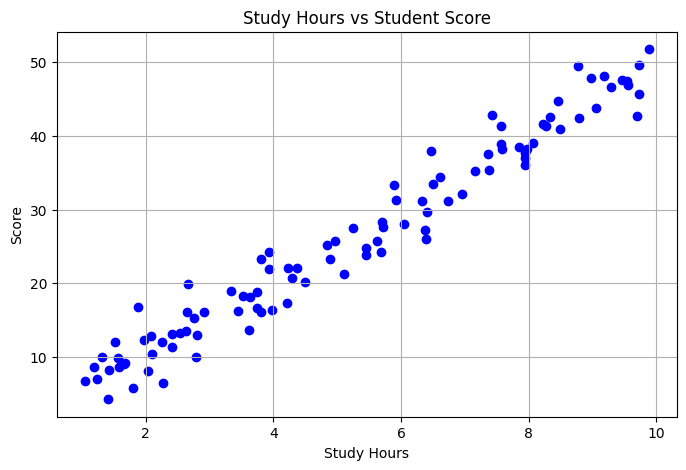

In [3]:
# Scatter plot of the generated data
plt.figure(figsize=(8, 5))
plt.scatter(df['Study Hours'], df['Score'], color='blue')
plt.title("Study Hours vs Student Score")
plt.xlabel("Study Hours")
plt.ylabel("Score")
plt.grid(True)
plt.show()


#🔀 Step 4: Train-Test Split

In [4]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#🔧 Step 5: Train the Linear Regression Model

In [5]:
# Create and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

#📈 Step 6: Predict and Evaluate

In [6]:
# Predict on test data
y_pred = model.predict(X_test)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("🔍 Model Evaluation Metrics")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.2f}")


🔍 Model Evaluation Metrics
Mean Squared Error (MSE): 5.88
R² Score: 0.97


#🧮 Step 7: Plot Predicted Line on Training Data

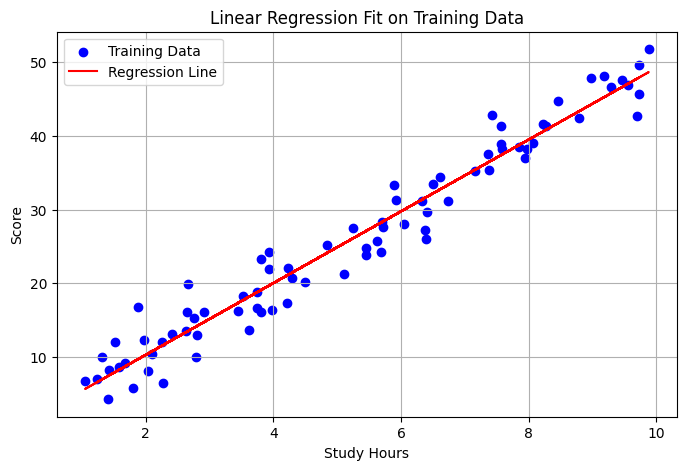

In [7]:
# Plot the best fit line on training data
plt.figure(figsize=(8, 5))
plt.scatter(X_train, y_train, color='blue', label='Training Data')
plt.plot(X_train, model.predict(X_train), color='red', label='Regression Line')
plt.title("Linear Regression Fit on Training Data")
plt.xlabel("Study Hours")
plt.ylabel("Score")
plt.legend()
plt.grid(True)
plt.show()


#📉 Step 8: Plot Prediction Errors

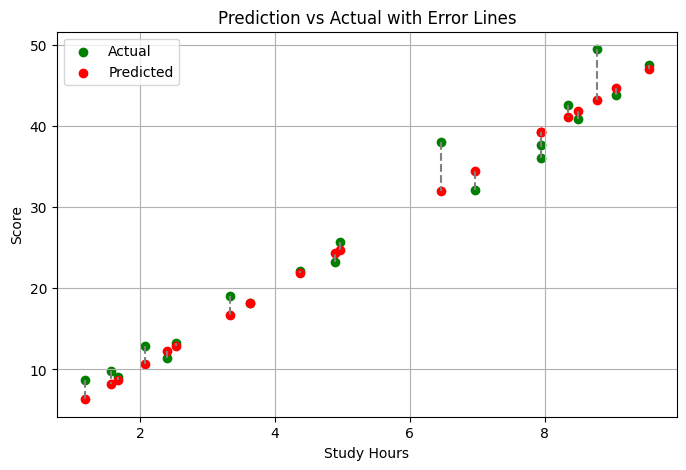

In [8]:
# Plot the residual errors
plt.figure(figsize=(8, 5))
plt.scatter(X_test, y_test, color='green', label="Actual")
plt.scatter(X_test, y_pred, color='red', label="Predicted")
for i in range(len(X_test)):
    plt.plot([X_test[i], X_test[i]], [y_test[i], y_pred[i]], color='gray', linestyle='--')

plt.title("Prediction vs Actual with Error Lines")
plt.xlabel("Study Hours")
plt.ylabel("Score")
plt.legend()
plt.grid(True)
plt.show()


#🧾 Notes for Students
Linear regression assumes a linear relationship between independent and dependent variables.

We use Mean Squared Error (MSE) to penalize larger errors more heavily.

R² Score explains how much of the variance in the dependent variable is explained by the model.

This practical helps visualize how model learns and where it makes mistakes.


#🔄 Part 2: Polynomial Regression

# Polynomial Regression (Non-linear Modeling)


#📥 Step 1: Import Additional Libraries

In [9]:
from sklearn.preprocessing import PolynomialFeatures


#🧮 Step 2: Create Polynomial Features

In [10]:
# We'll try a degree-2 polynomial regression
poly = PolynomialFeatures(degree=2)

# Transform original X data to include polynomial terms
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)

# Train model on polynomial features
poly_model = LinearRegression()
poly_model.fit(X_poly_train, y_train)



LinearRegression()

#📈 Step 3: Evaluate Polynomial Model

In [11]:
# Predict and evaluate
y_poly_pred = poly_model.predict(X_poly_test)
poly_mse = mean_squared_error(y_test, y_poly_pred)
poly_r2 = r2_score(y_test, y_poly_pred)

print("🔍 Polynomial Regression (Degree 2)")
print(f"Mean Squared Error: {poly_mse:.2f}")
print(f"R² Score: {poly_r2:.2f}")


🔍 Polynomial Regression (Degree 2)
Mean Squared Error: 5.72
R² Score: 0.97


#📊 Step 4: Plot Polynomial Fit

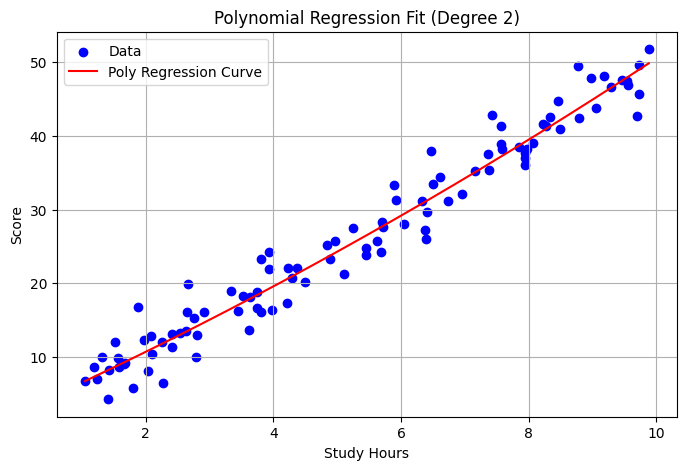

In [12]:
# Plot curve with more resolution
X_range = np.linspace(X.min(), X.max(), 200).reshape(-1, 1)
X_range_poly = poly.transform(X_range)
y_range_poly_pred = poly_model.predict(X_range_poly)

plt.figure(figsize=(8, 5))
plt.scatter(X, y, color='blue', label="Data")
plt.plot(X_range, y_range_poly_pred, color='red', label="Poly Regression Curve")
plt.title("Polynomial Regression Fit (Degree 2)")
plt.xlabel("Study Hours")
plt.ylabel("Score")
plt.legend()
plt.grid(True)
plt.show()
